In [2]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [67]:
df = pd.read_csv('StudentsPerformance.csv')
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


#### Check whether we have missing values or not!

In [218]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64

#### Distributions of scores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a232e2a10>,
      dtype=object)

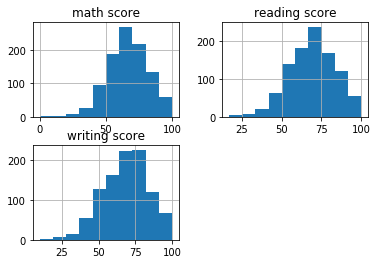

In [15]:
df.hist(bins=10)

In [219]:
def plot_piecharts(row,col,columns,df,title):
#     row,col = 3,2
    index = 0
    # columns = df.columns[:5]
    f, axes = plt.subplots(nrows=row,ncols=col, figsize=(20,12))
    f.suptitle(title, fontsize=16)
    for i in range(row):
        for j in range(col):
            
            if index < len(columns):
                
                axes[i][j].pie(df[columns[index]].value_counts(), labels=df[columns[index]].value_counts().index.tolist(), autopct='%1.1f%%',
                shadow=True, startangle=90)
                axes[i][j].set_title(columns[index])
                index+=1
#                 axes[i][j].axis('equal')
    axes[-1,-1].axis('off')
    plt.show()

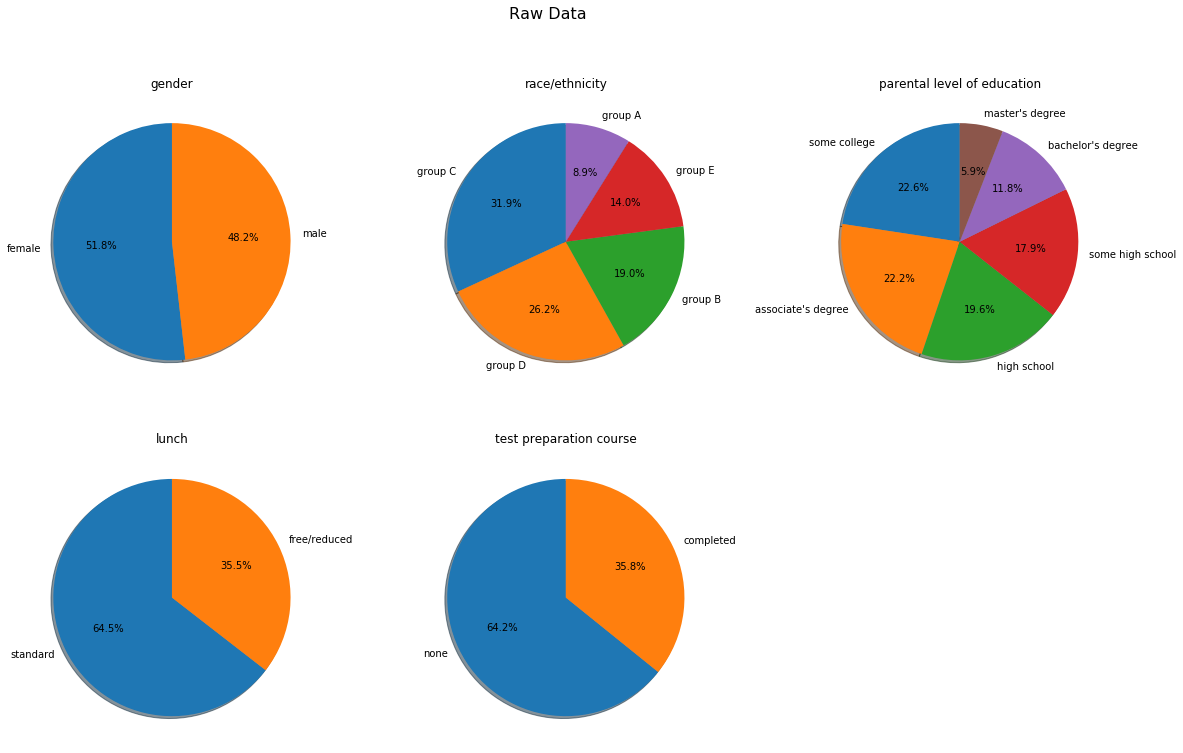

In [220]:
plot_piecharts(2,3,df.columns[:5],df,'Raw Data')

#### Lets calculate the total score by summing up the scores of the three sections

In [72]:
#calculating the total score
if not 'total score' in df.columns:
    df['total score'] = df[['math score', 'reading score',
           'writing score']].sum(axis=1)
df.describe().transpose()
# BP
# [item.get_xdata()for item in BP['whiskers']]


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0
total score,1000.0,203.312,42.771978,27.0,175.00,205.0,233.0,300.0


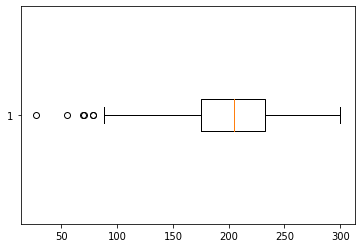

In [91]:
BP = plt.boxplot(df['total score'],vert = False)

## Now lets visualize our transformed data using pie-charts

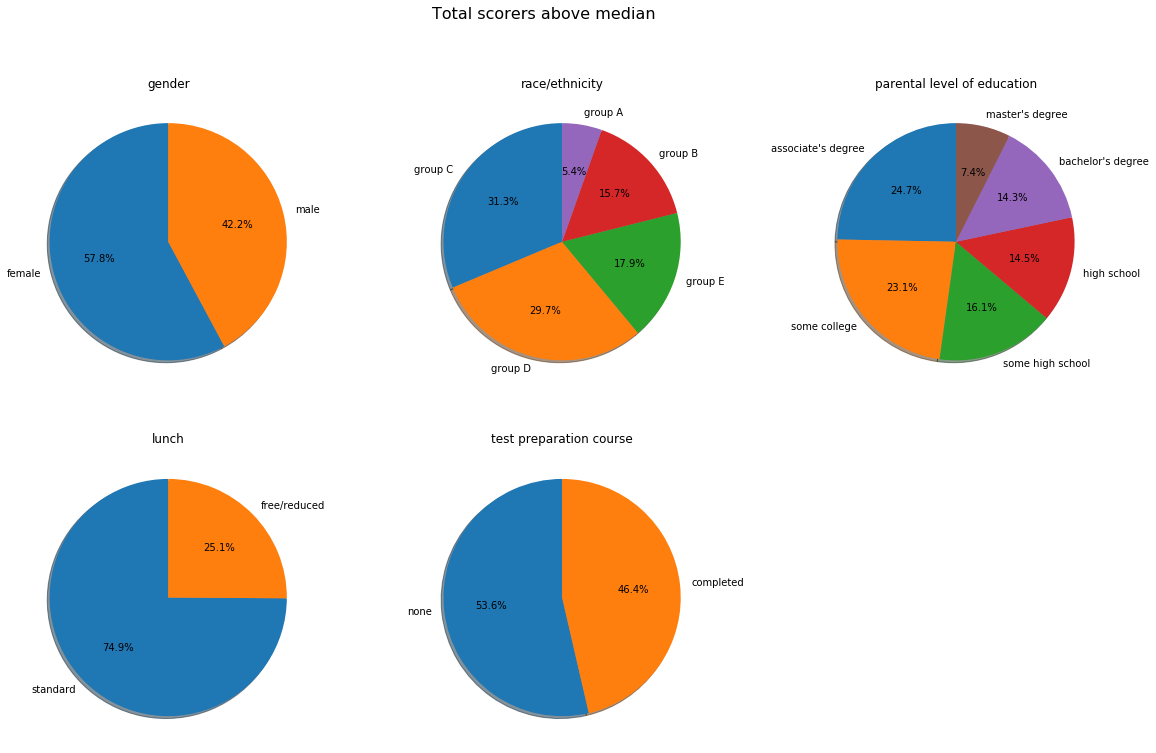

In [209]:
above_median = df[df['total score'] > df['total score'].median()]
plot_piecharts(2,3,df.columns[:5],above_median,'Total scorers above median')

#### Here, with the help of pie-charts we can observe that the highest percentage of students whose total score was above median belong to Ethnic group C then group D and follows.
#### We can also see that all the highest percentage of students whose score was above median have parents with atleast an associate degree.
##### When we look at the "test preparation course" pie-chart we see that 53.6% did not complete any preparation course but still managed to end up above median.


## Lets dig deeper whether it remains the same when we look for top scorers.

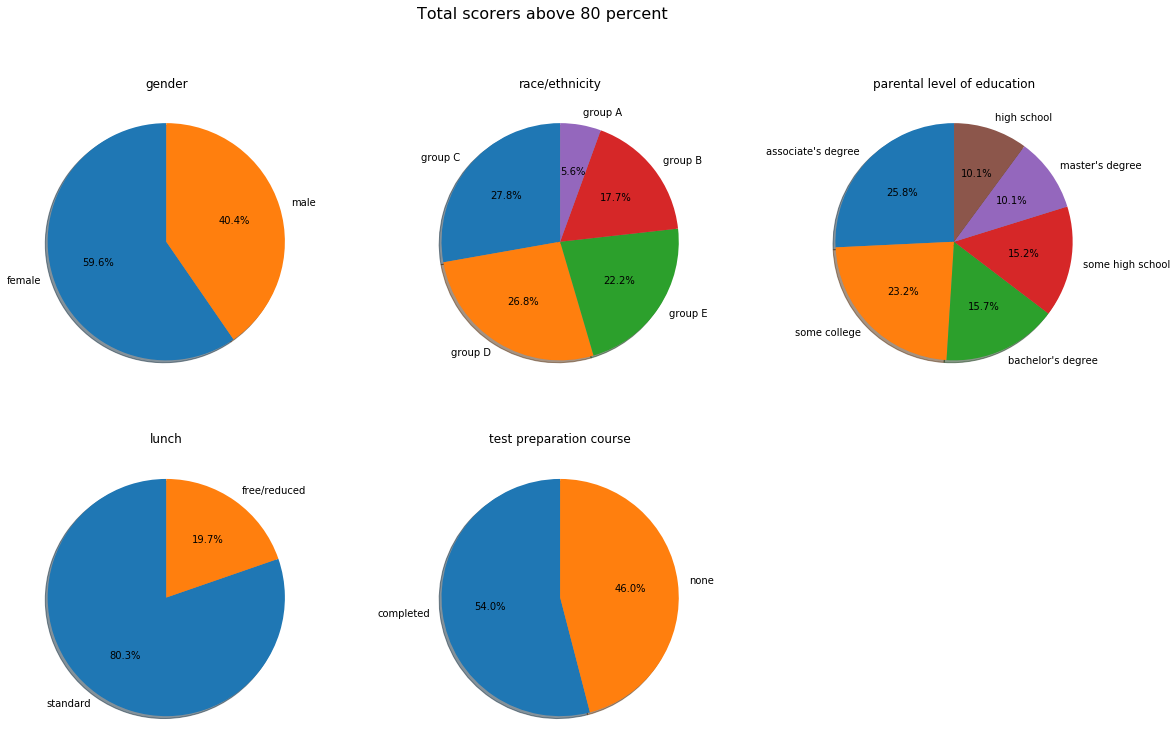

In [214]:
above_q3 = df[df['total score'] > df['total score'].quantile(0.8)]
plot_piecharts(2,3,df.columns[:5],above_q3,'Total scorers above 80 percent')

#### Just as I anticipated! Here we see that 54% of top scorers who have total scores more than 80% did complete Test preparation course which makes sense because Pre test preparation course give you more confidence to perform better in the real exam.

## Now, lets move forward and plot bar graphs for specific sections of the test (i.e., math, reading and writing) and see which ethnic groups are better at what sections..

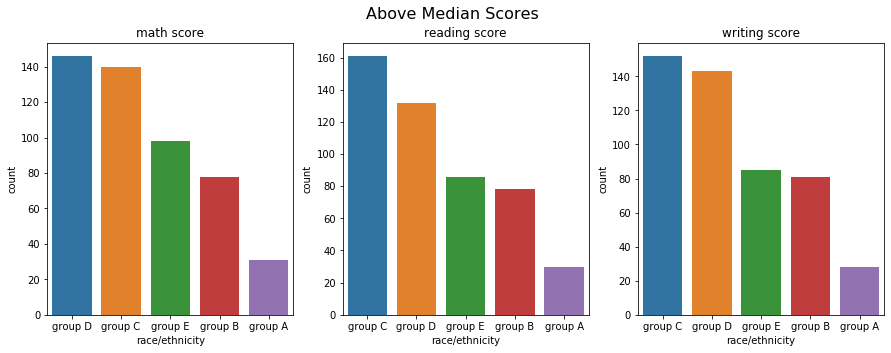

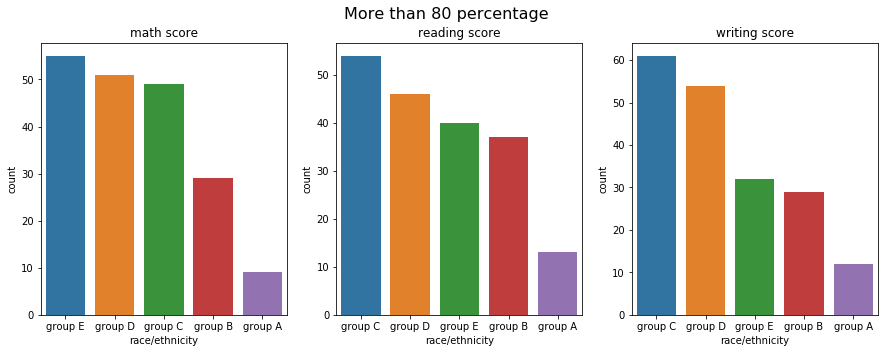

In [227]:
fig1, ax1 = plt.subplots(1,3, figsize=(15,5))
fig2, ax2 = plt.subplots(1,3, figsize=(15,5))
col_name = 'race/ethnicity'
for i,column in enumerate(['math score','reading score', 'writing score']):
    temp_df = df[df[column] > df[column].median()]
    sb.countplot(x = col_name, data=temp_df, order = temp_df[col_name].value_counts().index, ax=ax1[i])
    ax1[i].set_title(column)
    fig1.suptitle('Above Median Scores',fontsize = 16)
    
    temp_df = df[df[column] > df[column].quantile(0.8)]
    sb.countplot(x = col_name, data=temp_df, order = temp_df[col_name].value_counts().index, ax=ax2[i])
    ax2[i].set_title(column)
    fig2.suptitle('More than 80 percentage',fontsize = 16)
#     plt.tight_layout()
plt.show()

#### Group C is consistent in both sections as well as score groups which might mean that group C is the population where english is the primary language of communication. We can also conclude that group E comes from an ethnicity who has a knack for mathematics!

## Now let's analysis that data for students who scored less than median.

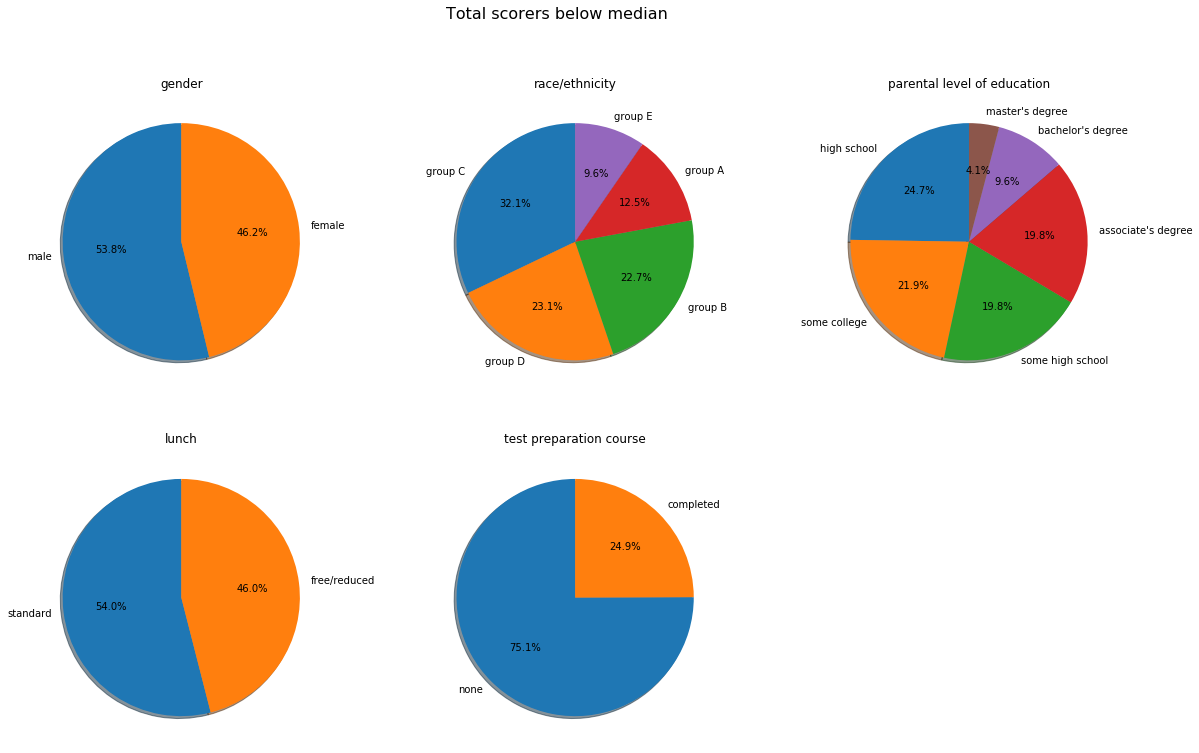

In [229]:
below_median = df[df['total score'] < df['total score'].median()]
plot_piecharts(2,3,df.columns[:5],below_median,'Total scorers below median')

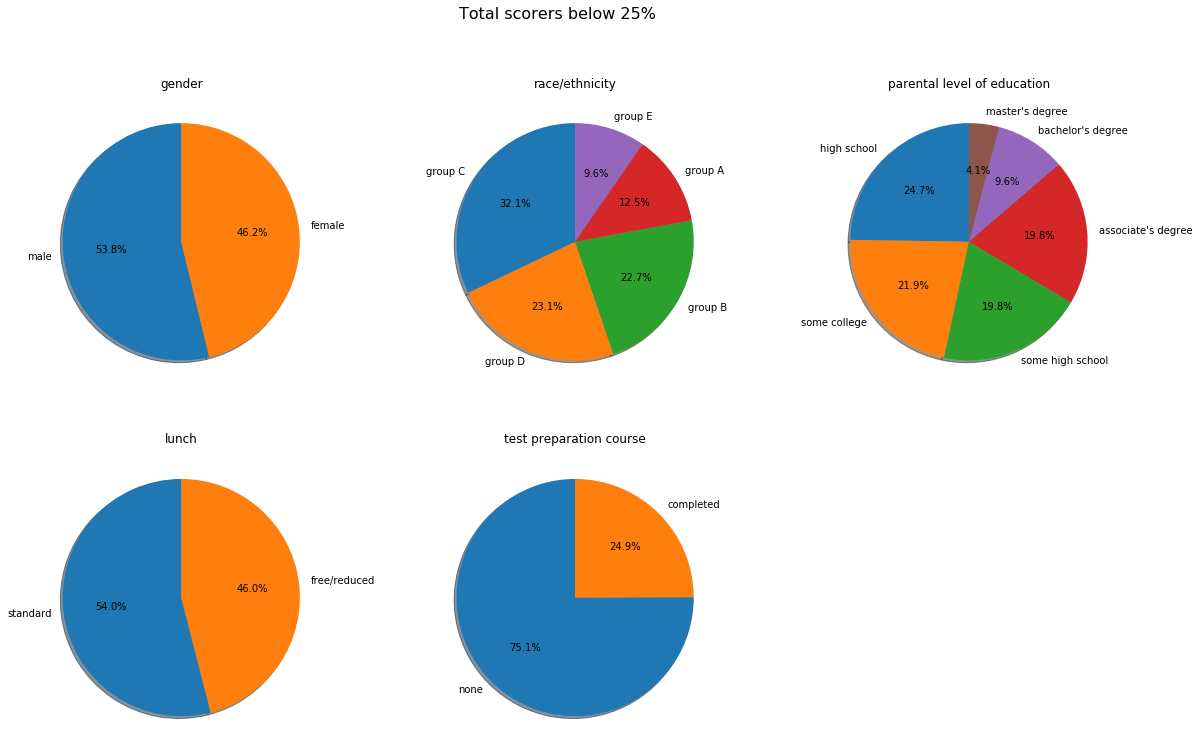

In [230]:
below_q1 = df[df['total score'] < df['total score'].quantile(0.25)]
plot_piecharts(2,3,df.columns[:5],below_median,'Total scorers below 25%')

#### We can clearly observe here that weak performers didn't take any test preparation course which might be the biggest reason of weak performance!

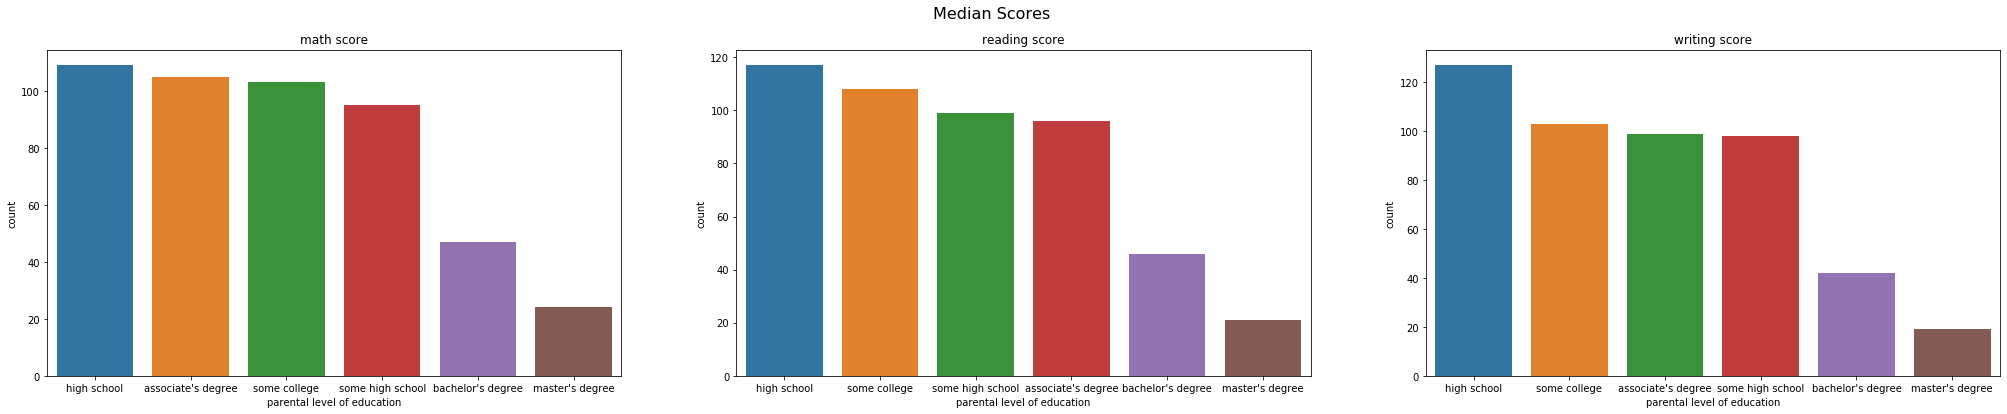

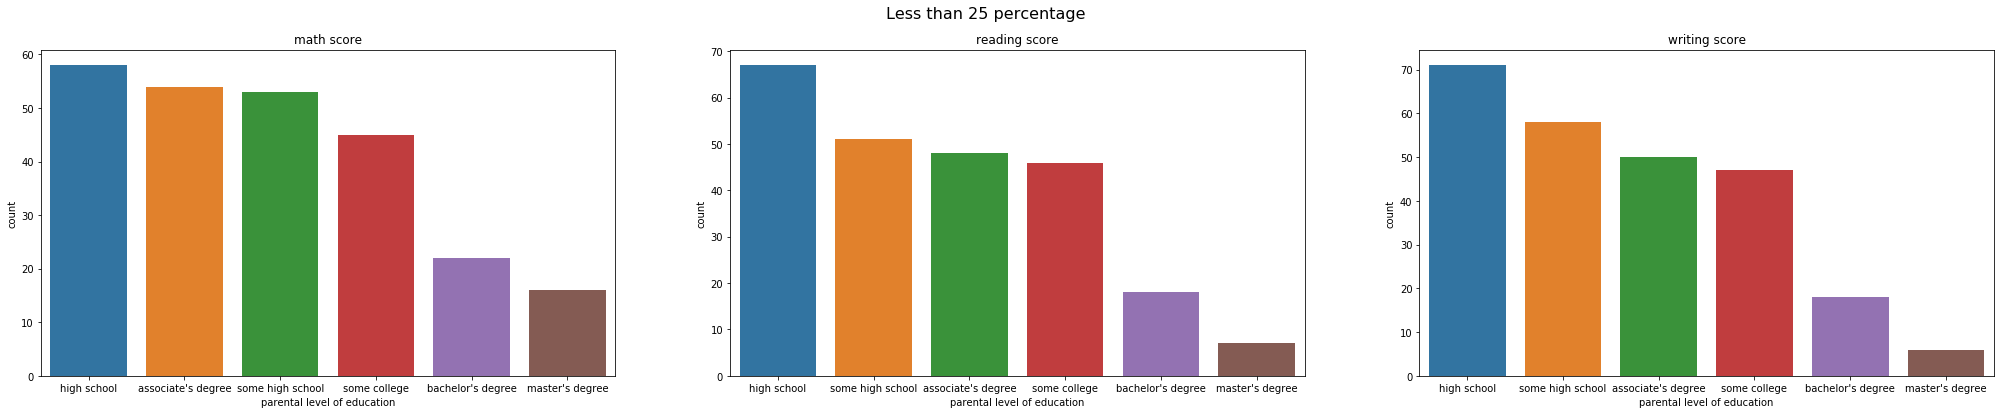

In [226]:
figsize = (35,6)
fig1, ax1 = plt.subplots(1,3, figsize=figsize)
fig2, ax2 = plt.subplots(1,3, figsize=figsize)
col_name = 'parental level of education'
for i,column in enumerate(['math score','reading score', 'writing score']):
    temp_df = df[df[column] < df[column].median()]
    sb.countplot(x = col_name, data=temp_df, order = temp_df[col_name].value_counts().index, ax=ax1[i])
    ax1[i].set_title(column)
    fig1.suptitle('Below Median Scores',fontsize = 16)
    
    temp_df = df[df[column] < df[column].quantile(0.25)]
    sb.countplot(x = col_name, data=temp_df, order = temp_df[col_name].value_counts().index, ax=ax2[i])
    ax2[i].set_title(column)
    fig2.suptitle('Less than 25 percentage',fontsize = 16)
#     plt.tight_layout()
plt.show()

#### Here, we can conclude that students with a weak performance usually have parents with only high school degree from which we can infer that students don't perform well because they don't have much help from their parents as they themselves are not highly qualified.

## Specifically in this dataset there is no such need of building a prediction model but just to calm my nerves I built a logistic regression classifier to predict gender based on section scores

In [237]:
#Logistic regression
features = df[['math score', 'reading score','writing score']]
labels = pd.DataFrame(np.where(df['gender'] == 'male', 1, 0),columns=['gender'])

#train-test split
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size = 0.2)

#train model
clf = LogisticRegression(random_state=0).fit(features_train,labels_train.to_numpy().ravel() )
# Predict model
labels_pred = clf.predict(features_test)

#accuracy
accuracy = clf.score(features_test,labels_test)

print ('The accuracy of the model is ',accuracy*100,'%')
print ('The confusion matrix for the model')
confusion_matrix(labels_test,labels_pred)

The accuracy of the model is  89.0 %
The confusion matrix for the model


array([[95, 12],
       [10, 83]])